In [1028]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Understanding

### Data Loading

In [1029]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [1030]:
df_movies = pd.read_csv('ml-latest-small/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [1031]:
df_tags = pd.read_csv('ml-latest-small/tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Exploratory Data Analysis

#### Mengecek Tipe Data

In [1032]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [1033]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [1034]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


#### Mengecek Missing Value

In [1035]:
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [1036]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [1037]:
df_tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

#### Mengecek Duplikasi Data

In [1038]:
df_movies.duplicated().sum()

0

In [1039]:
df_ratings.duplicated().sum()

0

In [1040]:
df_tags.duplicated().sum()

0

#### Mengecek Distribusi Data

In [1041]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


<Axes: >

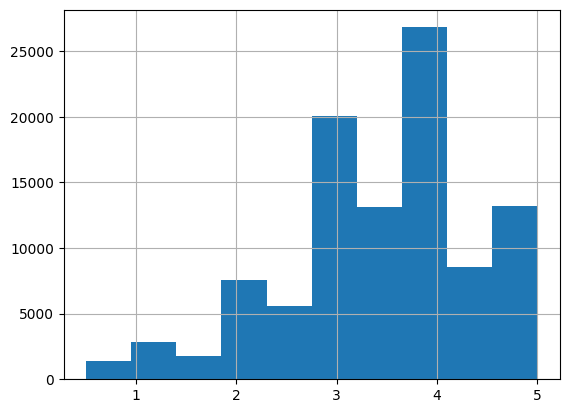

In [1042]:
df_ratings['rating'].hist()

## Data Preparation

### Merge Data

#### Data Similarity

In [1043]:
df_tags = df_tags.groupby('movieId')['tag'].agg(lambda x: ' '.join(x)).reset_index()
df_tags

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake
...,...,...
1567,183611,Comedy funny Rachel McAdams
1568,184471,adventure Alicia Vikander video game adaptation
1569,187593,Josh Brolin Ryan Reynolds sarcasm
1570,187595,Emilia Clarke star wars


In [1044]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.replace("|"," "))


In [1045]:
df_movies_similarity = pd.merge(df_movies,df_tags,how='left',on='movieId')
df_movies_similarity.fillna('',inplace=True)
df_movies_similarity

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,
9738,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,
9739,193585,Flint (2017),Drama,
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,


In [1046]:
df_movies_similarity['year'] = df_movies_similarity['title'].str.extract('(\d{4})', expand=False)
df_movies_similarity['title'] = df_movies_similarity['title'].str.replace('(\(\d{4}\))', '', regex=True)
df_movies_similarity['tags'] = df_movies_similarity['genres'] + " " + df_movies_similarity['tag'] + " " + df_movies_similarity['year'] 
df_movies_similarity.drop(columns=['genres','tag','year'],inplace=True)
df_movies_similarity

,movieId,title,tags
0,1,Toy Story,Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji,Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men,Comedy Romance moldy old 1995
3,4,Waiting to Exhale,Comedy Drama Romance 1995
4,5,Father of the Bride Part II,Comedy pregnancy remake 1995
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action Animation Comedy Fantasy 2017
9738,193583,No Game No Life: Zero,Animation Comedy Fantasy 2017
9739,193585,Flint,Drama 2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action Animation 2018


#### Data Recommendation

In [1047]:
df_ratings_recommendation = pd.merge(df_ratings,df_movies,how='left',on='movieId')
df_ratings_recommendation.drop(columns=['timestamp'],axis=1,inplace=True)
df_ratings_recommendation['genres'] = df_ratings_recommendation['genres'].apply(lambda x: np.nan if x == '(no genres listed)' else x)
df_ratings_recommendation.dropna(inplace=True)
df_ratings_recommendation.reset_index()
df_ratings_recommendation

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy Romance
2,1,6,4.0,Heat (1995),Action Crime Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime Mystery Thriller
...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama Horror Thriller
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action Crime Thriller
100833,610,168250,5.0,Get Out (2017),Horror
100834,610,168252,5.0,Logan (2017),Action Sci-Fi


In [1048]:
df_ratings_recommendation['genres'] = df_ratings_recommendation['genres'].str.split(' ')
df_genres = df_ratings_recommendation['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
df_ratings_recommendation = pd.concat([df_ratings_recommendation, df_genres], axis=1)
df_ratings_recommendation.drop(columns=['genres'],inplace=True)
df_ratings_recommendation

C:\Users\ACER\AppData\Local\Temp\ipykernel_2868\4189653943.py:2: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df_genres = df_ratings_recommendation['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')


,userId,movieId,rating,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,1,4.0,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,6,4.0,Heat (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
100832,610,168248,5.0,John Wick: Chapter Two (2017),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,168250,5.0,Get Out (2017),0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100834,610,168252,5.0,Logan (2017),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Data Transformation

#### Data User

In [1049]:
df_user = df_ratings_recommendation.copy()
df_user.drop(columns=['movieId','title'],inplace=True)
df_user

,userId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,...,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4.0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,5.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,5.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,4.0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
100832,610,5.0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
100833,610,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100834,610,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1050]:
for i in range(2, 21):
    genre_column = df_user.columns[i]
    df_user[genre_column] = df_user.apply(lambda row: row['rating'] if row[genre_column] == 1 else np.nan,axis=1)

In [1051]:
genre_columns = df_user.columns[2:]
df_user_avg = df_user.groupby('userId')[genre_columns].mean().reset_index()
df_user_avg.fillna(0,inplace=True)
df_user_avg

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.0000,0.000000,0.000000
1,2,4.166667,0.000000,0.000000,4.000000,0.000000,4.500000,3.954545,3.800000,3.700000,4.000000,3.000000,3.882353,4.500000,3.500000,3.875000,0.000000,0.0000,3.750000,4.333333
2,3,2.727273,0.500000,0.500000,1.000000,3.375000,0.500000,3.571429,0.500000,4.142857,5.000000,4.687500,0.750000,0.500000,0.000000,4.200000,0.500000,0.0000,0.000000,0.000000
3,4,3.655172,4.000000,3.800000,3.509615,3.684211,3.379310,3.320000,3.814815,3.552632,3.478261,4.250000,3.483333,3.571429,3.800000,2.833333,4.000000,4.0000,3.000000,4.000000
4,5,3.250000,4.333333,4.111111,3.466667,4.142857,3.090909,3.111111,3.833333,3.555556,4.000000,3.000000,3.800000,3.333333,3.000000,2.500000,4.400000,0.0000,3.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,3.503401,3.714286,3.448980,3.565321,3.597938,3.740845,3.178808,3.654135,3.525126,3.791209,3.346154,3.787966,3.792308,3.411765,3.556962,3.727273,3.8125,3.062500,3.800000
606,607,3.466667,3.333333,3.421053,3.327273,3.571429,3.517241,3.722222,3.814815,4.114754,4.647059,4.114286,4.012195,4.166667,4.000000,3.250000,3.600000,0.0000,5.000000,0.000000
607,608,3.220994,3.118182,2.460227,2.736620,3.000000,2.886792,3.330325,3.613014,3.536680,3.550725,3.319588,3.437500,3.578947,2.636364,3.296407,2.757576,3.7500,4.000000,3.000000
608,609,3.200000,3.000000,3.000000,3.285714,3.000000,3.200000,3.090909,3.500000,3.285714,0.000000,3.500000,3.368421,3.500000,4.000000,3.000000,0.000000,0.0000,3.000000,3.000000


In [1052]:
df_user = pd.merge(df_user,df_user_avg,how='left',on='userId')
df_user

,userId,rating,Adventure_x,Animation_x,Children_x,Comedy_x,Fantasy_x,Romance_x,Action_x,Crime_x,...,Mystery_y,Horror_y,Drama_y,War_y,Western_y,Sci-Fi_y,Musical_y,Film-Noir_y,IMAX_y,Documentary_y
0,1,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
1,1,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
2,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
3,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
4,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100784,610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100785,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100786,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100787,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2


In [1053]:
df_user.drop(columns=df_user.columns[2:21],inplace=True)
df_user

,userId,rating,Adventure_y,Animation_y,Children_y,Comedy_y,Fantasy_y,Romance_y,Action_y,Crime_y,...,Mystery_y,Horror_y,Drama_y,War_y,Western_y,Sci-Fi_y,Musical_y,Film-Noir_y,IMAX_y,Documentary_y
0,1,4.0,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
1,1,4.0,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
2,1,4.0,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
3,1,5.0,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
4,1,5.0,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100784,610,4.0,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100785,610,5.0,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100786,610,5.0,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100787,610,5.0,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2


In [1054]:
df_user.drop(columns=['rating'],inplace=True)
df_user.columns = ['userId'] + genre_columns.tolist()
df_user

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
1,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
2,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
3,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
4,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100784,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100785,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100786,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100787,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2


#### Data Item

In [1055]:
df_item = df_ratings_recommendation.copy()
df_item.drop(columns=['userId','rating','title'],inplace=True)
df_item

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,47,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,50,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,166534,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
100832,168248,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
100833,168250,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100834,168252,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


#### Data Rating

In [1056]:
df_rating = df_ratings_recommendation['rating']
df_rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100789, dtype: float64